In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem 1: Effect of Regional Economic Characteristics on Mobility Demand
#### Related Area: Casual Inference
##### Key Parameters: 
- variables: industries, employment rate, population density, regional transportation availability
- observable result: a mobility score combining modes of transportation (need bound and weight tuning)
- macro confounding factors (to keep in mind and may be avoided): COVID effect, lock-down policy 

## 1. Exploratory Data Analysis
#### Goals:
- evaluate and visualize selected datasets 
- clean the datasets to take care of outliers, NaNs, etc.

#### Datasets: 
- industry.csv: data of size of key industry and employment headcount in county level
- california_mobility.csv: data of conuty-wise daily mobility score of retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, residential. 

### Mobility Dataset

In [8]:
mobility = pd.read_csv("Regional_Mobility_US.csv")
mobility.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-01,-47.0,-37.0,-21.0,-62.0,-75.0,27.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-02,-26.0,-13.0,-14.0,-33.0,-21.0,9.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-03,-27.0,-16.0,-24.0,-33.0,-17.0,7.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-04,-19.0,-8.0,-23.0,-39.0,-34.0,12.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2021-01-05,-20.0,-6.0,-20.0,-39.0,-34.0,12.0


In [45]:
ca_mobility = mobility[mobility["sub_region_1"] == "California"]
print(f"There are {ca_mobility.shape[0]} entries in California with {len(ca_mobility['sub_region_2'].unique())} unique counties")
ca_mobility.iloc[3000:3005]

There are 18015 entries in California with 57 unique counties


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
52454,US,United States,California,Fresno County,NaN,NaN,6019.0,ChIJb4MUvgDhlIAR17RXLUdHFN0,2021-05-01,-4.0,0.0,16.0,-11.0,-15.0,0.0
52455,US,United States,California,Fresno County,NaN,NaN,6019.0,ChIJb4MUvgDhlIAR17RXLUdHFN0,2021-05-02,0.0,1.0,33.0,-2.0,-8.0,0.0
52456,US,United States,California,Fresno County,NaN,NaN,6019.0,ChIJb4MUvgDhlIAR17RXLUdHFN0,2021-05-03,-2.0,7.0,-7.0,-13.0,-31.0,5.0
52457,US,United States,California,Fresno County,NaN,NaN,6019.0,ChIJb4MUvgDhlIAR17RXLUdHFN0,2021-05-04,-3.0,5.0,-4.0,-18.0,-29.0,6.0
52458,US,United States,California,Fresno County,NaN,NaN,6019.0,ChIJb4MUvgDhlIAR17RXLUdHFN0,2021-05-05,-4.0,4.0,-9.0,-17.0,-28.0,5.0


In [25]:
ca_mobility.describe()

,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,17695.000000,16875.000000,15914.000000,14053.000000,13780.000000,18015.000000,15517.000000
mean,NaN,6058.188697,-10.094519,-1.712329,11.021134,-25.616401,-25.460339,6.599794
std,NaN,33.007003,16.823203,13.477117,38.460808,30.133711,13.095268,5.150398
min,NaN,6001.000000,-75.000000,-58.000000,-83.000000,-83.000000,-84.000000,-9.000000
25%,NaN,6029.000000,-20.000000,-10.000000,-12.000000,-45.000000,-33.000000,3.000000
50%,NaN,6057.000000,-11.000000,-3.000000,6.000000,-31.000000,-24.000000,5.000000
75%,NaN,6085.000000,-1.000000,4.000000,27.000000,-12.000000,-16.000000,9.000000
max,NaN,6115.000000,120.000000,91.000000,302.000000,169.000000,14.000000,34.000000


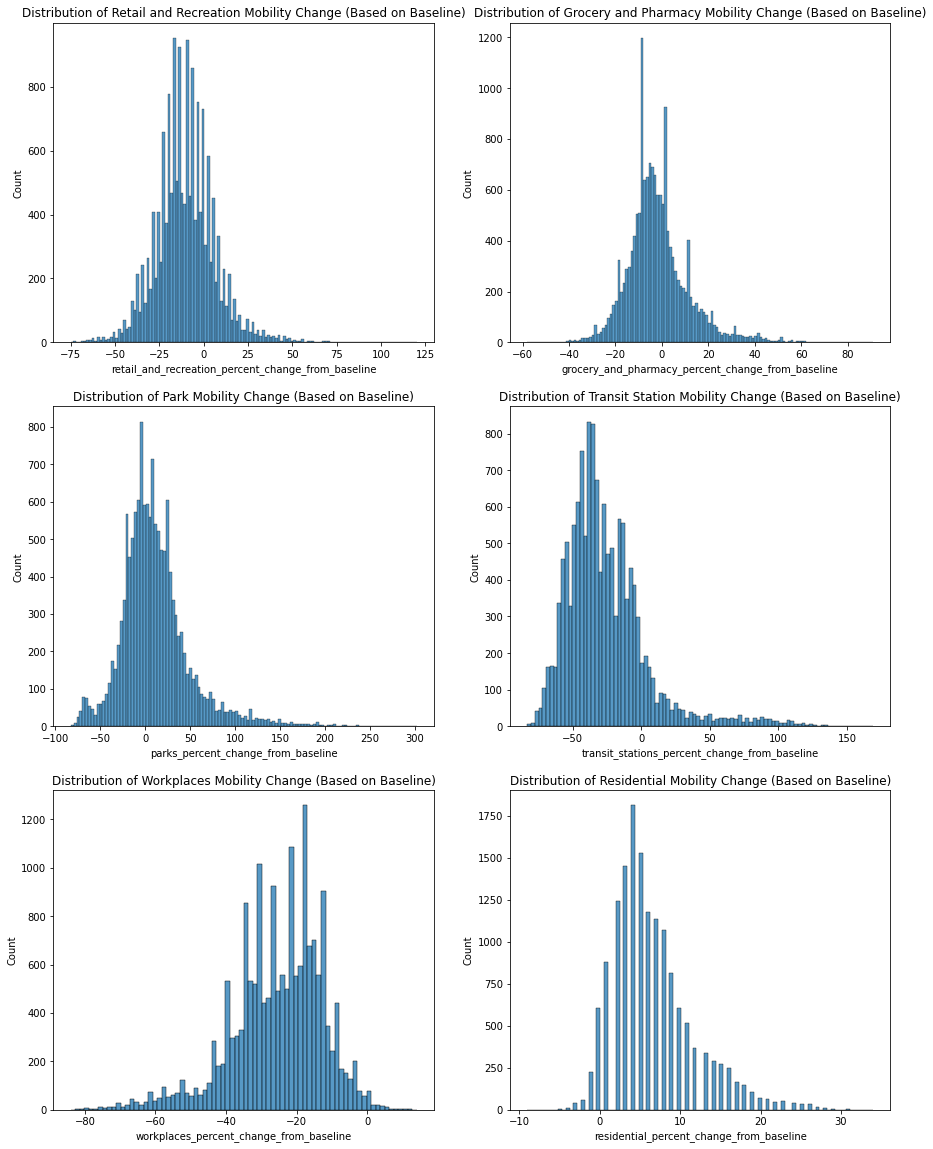

In [43]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

sns.histplot(ca_mobility['retail_and_recreation_percent_change_from_baseline'], ax=ax[0][0]).set_title("Distribution of Retail and Recreation Mobility Change (Based on Baseline)")
sns.histplot(ca_mobility['grocery_and_pharmacy_percent_change_from_baseline'], ax=ax[0][1]).set_title("Distribution of Grocery and Pharmacy Mobility Change (Based on Baseline)")
sns.histplot(ca_mobility['parks_percent_change_from_baseline'], ax=ax[1][0]).set_title("Distribution of Park Mobility Change (Based on Baseline)")
sns.histplot(ca_mobility['transit_stations_percent_change_from_baseline'], ax=ax[1][1]).set_title("Distribution of Transit Station Mobility Change (Based on Baseline)")
sns.histplot(ca_mobility['workplaces_percent_change_from_baseline'], ax=ax[2][0]).set_title("Distribution of Workplaces Mobility Change (Based on Baseline)")
sns.histplot(ca_mobility['residential_percent_change_from_baseline'], ax=ax[2][1]).set_title("Distribution of Residential Mobility Change (Based on Baseline)");

We can see bell-shape curves in distribution of scores centered around 0 for retail and grocery, showing both are relatively normal. Parks and transits have long tail to the right while transit has a significant lower overall mean. Workspace has a clear negativity in the score comparing to baseline, while residential has a clear positivity in the score. The 6 variables exhibit different characteristics. 

We will dig deeper into the data and formulate a metric to test causality with industry data. 

#### Looking at Alameda County 
County-specific data will have only time as the difference. Overview the time series data here. 

In [47]:
alameda_mobility = ca_mobility[ca_mobility["sub_region_2"] == "Alameda County"]
print(f"There are {alameda_mobility.shape[0]} entries in Alameda County. ")
alameda_mobility.head(5)

There are 320 entries in Alameda County. 


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
49774,US,United States,California,Alameda County,NaN,NaN,6001.0,ChIJWRd5NDfyj4ARc30TGxHHxmg,2021-01-01,-61.0,-43.0,5.0,-81.0,-81.0,31.0
49775,US,United States,California,Alameda County,NaN,NaN,6001.0,ChIJWRd5NDfyj4ARc30TGxHHxmg,2021-01-02,-52.0,-30.0,-49.0,-65.0,-31.0,15.0
49776,US,United States,California,Alameda County,NaN,NaN,6001.0,ChIJWRd5NDfyj4ARc30TGxHHxmg,2021-01-03,-48.0,-27.0,-18.0,-57.0,-23.0,11.0
49777,US,United States,California,Alameda County,NaN,NaN,6001.0,ChIJWRd5NDfyj4ARc30TGxHHxmg,2021-01-04,-43.0,-24.0,-40.0,-70.0,-56.0,23.0
49778,US,United States,California,Alameda County,NaN,NaN,6001.0,ChIJWRd5NDfyj4ARc30TGxHHxmg,2021-01-05,-41.0,-16.0,-9.0,-68.0,-55.0,22.0


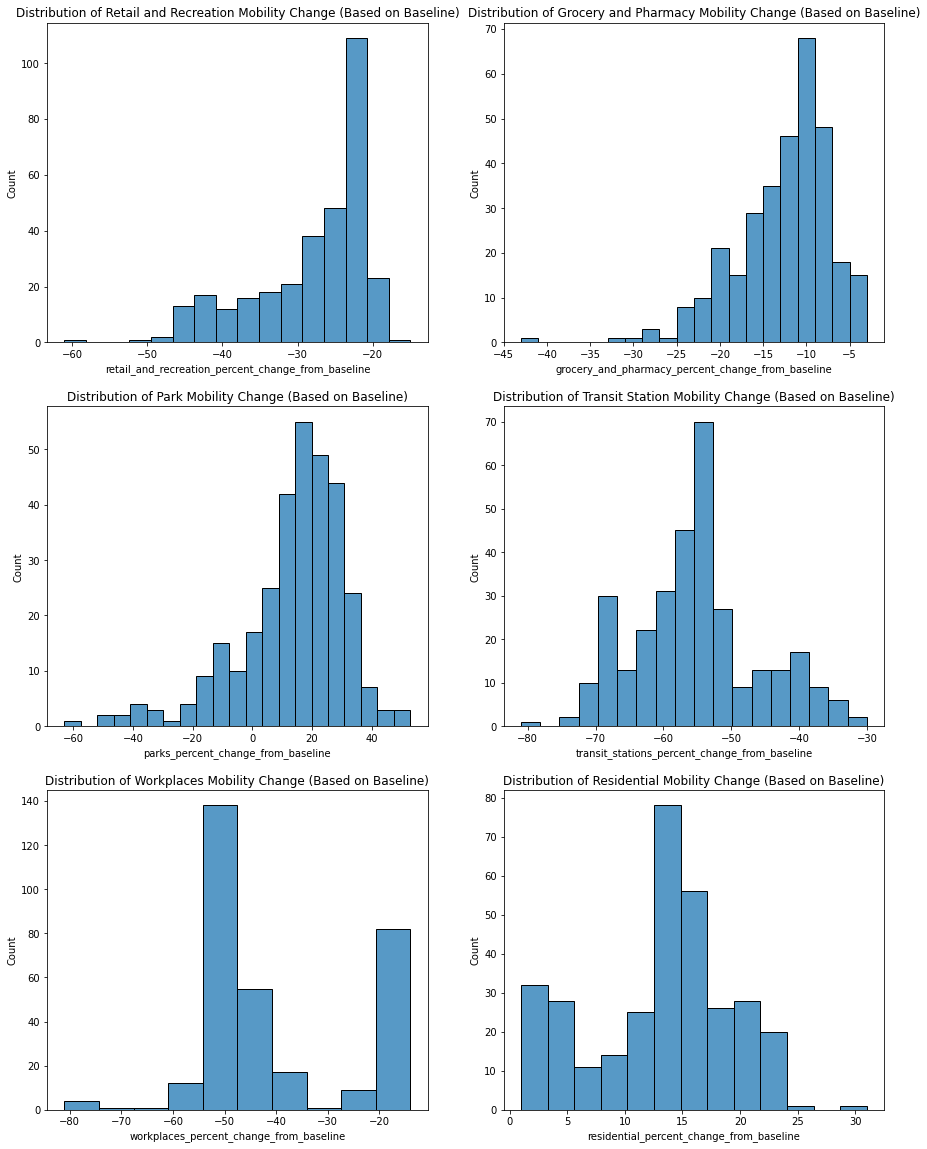

In [48]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

sns.histplot(alameda_mobility['retail_and_recreation_percent_change_from_baseline'], ax=ax[0][0]).set_title("Distribution of Retail and Recreation Mobility Change (Based on Baseline)")
sns.histplot(alameda_mobility['grocery_and_pharmacy_percent_change_from_baseline'], ax=ax[0][1]).set_title("Distribution of Grocery and Pharmacy Mobility Change (Based on Baseline)")
sns.histplot(alameda_mobility['parks_percent_change_from_baseline'], ax=ax[1][0]).set_title("Distribution of Park Mobility Change (Based on Baseline)")
sns.histplot(alameda_mobility['transit_stations_percent_change_from_baseline'], ax=ax[1][1]).set_title("Distribution of Transit Station Mobility Change (Based on Baseline)")
sns.histplot(alameda_mobility['workplaces_percent_change_from_baseline'], ax=ax[2][0]).set_title("Distribution of Workplaces Mobility Change (Based on Baseline)")
sns.histplot(alameda_mobility['residential_percent_change_from_baseline'], ax=ax[2][1]).set_title("Distribution of Residential Mobility Change (Based on Baseline)");

We can see that the distribution of mobility data of Alameda County only has a different distribution than the California state-wide distribution. This is promising, since the mobility level in different counties should have different patterns and ranges. Next, we will investigate the time series data. 

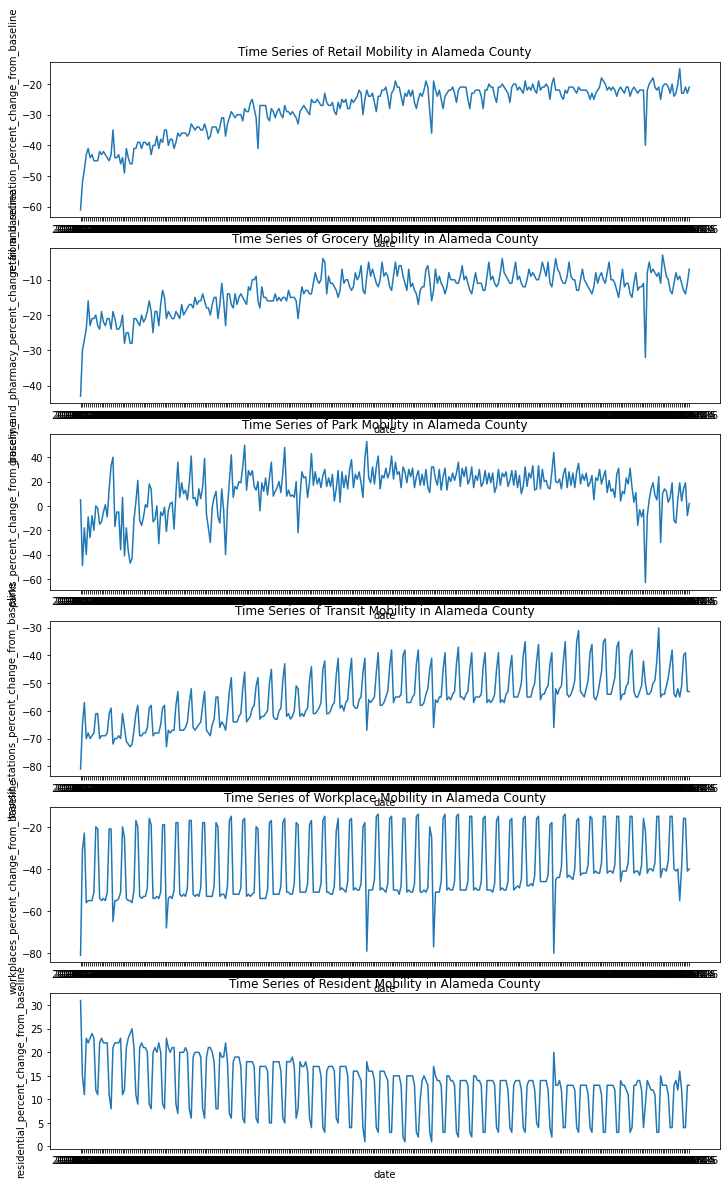

In [57]:
fig, ax = plt.subplots(6, 1, figsize=(12, 20))

sns.lineplot(x="date", y="retail_and_recreation_percent_change_from_baseline", data=alameda_mobility, ax=ax[0]).set_title("Time Series of Retail Mobility in Alameda County")
sns.lineplot(x="date", y="grocery_and_pharmacy_percent_change_from_baseline", data=alameda_mobility, ax=ax[1]).set_title("Time Series of Grocery Mobility in Alameda County")
sns.lineplot(x="date", y="parks_percent_change_from_baseline", data=alameda_mobility, ax=ax[2]).set_title("Time Series of Park Mobility in Alameda County")
sns.lineplot(x="date", y="transit_stations_percent_change_from_baseline", data=alameda_mobility, ax=ax[3]).set_title("Time Series of Transit Mobility in Alameda County")
sns.lineplot(x="date", y="workplaces_percent_change_from_baseline", data=alameda_mobility, ax=ax[4]).set_title("Time Series of Workplace Mobility in Alameda County")
sns.lineplot(x="date", y="residential_percent_change_from_baseline", data=alameda_mobility, ax=ax[5]).set_title("Time Series of Resident Mobility in Alameda County");

### Industry Dataset

In [43]:
industry = pd.read_csv("industry.csv", thousands=',')
industry.head(10)

,StartEndYear,Period,Area,Series code,Industry,Adjusted,Benchmark,No. of Employed
0,2020,Annual,Alameda County,0,Total Nonfarm,Not Adj,2020,749100
1,2020,Annual,Alameda County,1000000,Total Wage and Salary,Not Adj,2020,749900
2,2020,Annual,Alameda County,6000000,Goods Producing,Not Adj,2020,129600
3,2020,Annual,Alameda County,7000000,Service Providing,Not Adj,2020,619600
4,2020,Annual,Alameda County,11000000,Total Farm,Not Adj,2020,700
5,2020,Annual,Alameda County,15000000,"Natural Resources, Mining and Constructi",Not Adj,2020,46600
6,2020,Annual,Alameda County,30000000,Manufacturing,Not Adj,2020,83000
7,2020,Annual,Alameda County,31000000,Durable Goods,Not Adj,2020,61500
8,2020,Annual,Alameda County,32000000,Nondurable Goods,Not Adj,2020,21500
9,2020,Annual,Alameda County,40000000,"Trade, Transportation and Utilities",Not Adj,2020,128900


## Map Counties to Predominant Industry ##

In [44]:
industry_a = industry[["StartEndYear", "Area", "Industry", "No. of Employed"]]
industry = industry.astype({"No. of Employed": int})
industry_a.head(10)

,StartEndYear,Area,Industry,No. of Employed
0,2020,Alameda County,Total Nonfarm,749100
1,2020,Alameda County,Total Wage and Salary,749900
2,2020,Alameda County,Goods Producing,129600
3,2020,Alameda County,Service Providing,619600
4,2020,Alameda County,Total Farm,700
5,2020,Alameda County,"Natural Resources, Mining and Constructi",46600
6,2020,Alameda County,Manufacturing,83000
7,2020,Alameda County,Durable Goods,61500
8,2020,Alameda County,Nondurable Goods,21500
9,2020,Alameda County,"Trade, Transportation and Utilities",128900


In [79]:
industry_b = pd.pivot_table(industry_a, values='No. of Employed', index='Area', columns="Industry", aggfunc=np.mean, fill_value=-1)
# remove total columns because they will skew our average # of employed calculation
industry_b = industry_b.drop(columns=['Total Nonfarm', 'Total Wage and Salary', 
                                      'Total Private', 'Service Providing', 'Private Service Providing'])

In [80]:
industry_b["Top Industry"] = industry_b.idxmax(axis=1)

In [81]:
industry_b.head(10)

Industry,Accommodation,Accommodation and Food Service,"Accounting, Tax Preparation and Bookkeep",Activities Related to Credit Intermediat,Activities Related to Real Estate,Administrative and Support Services,Administrative and Support and Waste Ser,Advertising and Related Services,Aerospace Product and Parts Manufacturin,"Agencies, Brokerages, and Other Insuranc",...,Transportation and Warehousing,"Transportation, Warehousing and Utilitie",Travel Arrangement and Reservation Servi,Truck Transportation,Utilities,Warehousing and Storage,Waste Management and Remediation Service,Wholesale Electronic Markets and Agents,Wholesale Trade,Top Industry
Area,,,,,,,,,,,,,,,,,,,,,
Alameda County,-1.0,55300.000000,-1.0,-1.0,-1.0,-1.000000,38736.363636,-1.0,-1.0,-1,...,-1.000000,27200.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,36390.909091,"Trade, Transportation and Utilities"
Alpine County,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1,...,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,Government
Amador County,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1,...,-1.000000,199.090909,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,64.545455,Government
Butte County,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1,...,-1.000000,1581.818182,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,1900.000000,Educational and Health Services
Calaveras County,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1,...,-1.000000,270.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,139.090909,Government
Colusa County,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1,...,-1.000000,200.909091,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,638.181818,Total Farm
Contra Costa County,-1.0,30745.454545,-1.0,-1.0,-1.0,-1.000000,20100.000000,-1.0,-1.0,-1,...,-1.000000,10072.727273,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,9045.454545,Educational and Health Services
Del Norte County,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1,...,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,Government
El Dorado County,-1.0,6490.909091,-1.0,-1.0,-1.0,-1.000000,2863.636364,-1.0,-1.0,-1,...,-1.000000,672.727273,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,863.636364,Government


In [82]:
industry_b["Top Industry"]

Area
Alameda County            Trade, Transportation and Utilities
Alpine County                                      Government
Amador County                                      Government
Butte County                  Educational and Health Services
Calaveras County                                   Government
Colusa County                                      Total Farm
Contra Costa County           Educational and Health Services
Del Norte County                                   Government
El Dorado County                                   Government
Fresno County                                      Government
Glenn County                                       Total Farm
Humboldt County                                    Government
Imperial County                                    Government
Inyo County                                        Government
Kern County                                        Government
Kings County                                       Government
Lak

## Did the top industry change over time? 